In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import statistics
import scipy.stats as sts
n = 16
a = -1
gamma = 0.9
sigma = 4
M= 1950

1.1

In [3]:
sample = np.random.normal(a, sigma, n)#создание выборки
mean = statistics.mean(sample)

In [6]:
t = (1 + gamma)/2
t_gamma=  sts.norm().ppf(t)
print(t)
print(t_gamma)

delta = t_gamma * sigma/math.sqrt(n)
I_left = mean - delta
I_right = mean + delta
print("доверительный интервал, найденный вручную: ", I_left, I_right)

0.95
1.6448536269514722
доверительный интервал, найденный вручную:  -1.60238281518589 1.6873244387170543


In [7]:
interval = sts.norm.interval(gamma, mean, sigma/math.sqrt(n))
print("доверительный интервал, найденный python: ", interval)

доверительный интервал, найденный python:  (-1.6023828151858908, 1.6873244387170543)


1.2

In [24]:
## S = sqrt((Σ(xi - x̄)²) / (n - 1))
S_1 = np.std(sample, ddof=1)
print(S_1)

sum_of_squared_differences = sum((xi - mean) ** 2 for xi in sample)
# Вычислите исправленное стандартное отклонение
n = len(sample)
S_2 = math.sqrt(sum_of_squared_differences / (n - 1))
print(S_2)


delta = (t_gamma*S_1)/np.sqrt(n)
I_left = mean - delta
I_right = mean + delta
print("доверительный интервал, найденный вручную: ", I_left, I_right)


3.0524072219049176
3.0524072219049176
доверительный интервал, найденный вручную:  -1.2127199607052106 1.2976615842363748


In [28]:
##confidence_interval = stats.t.interval(confidence_level, degrees_of_freedom, loc=x_bar, scale=S)
S = sts.sem(sample)
interval_2 = sts.t.interval(gamma, df=n-1, loc=mean, scale= S)
print("\nдоверительный интервал, найденный python: \n", interval_2)


доверительный интервал, найденный python: 
 (-1.295285079754153, 1.3802267032853168)


1.3

In [29]:
##sample_variance = Σ(xi - x̄)² / (n - 1)
S_V = 1/(n-1)*np.sum((sample-a)**2)
sample_variance = sum((x - sum(sample)/n)**2 for x in sample) / (n-1)
print(S_V,sample_variance)
q1 = (1-gamma)/2
q2 = (1+gamma)/2
x_1 = sts.chi2.ppf(q1,n-1)
x_2 = sts.chi2.ppf(q2,n-1)
I_leftm = (n-1)*sample_variance/x_2
I_rightm = (n-1)*sample_variance/x_1
print("доверительный интервал, найденный вручную: ", I_leftm, I_rightm)

10.476384934612701 9.317189848337296
доверительный интервал, найденный вручную:  5.591255445169009 19.24788968448988


2

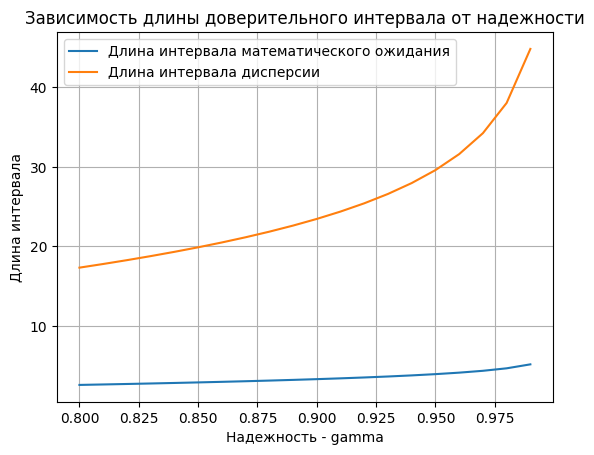

In [39]:
confidence_levels = np.linspace(0.80, 0.99, 20)

# Создайте списки для хранения длин интервалов для мат. ожидания и дисперсии
lengths_mean = []
lengths_variance = []

# Вычислите длины доверительных интервалов для каждого уровня доверия
for confidence_level in confidence_levels:
    # Вычисляем интервальную оценку для математического ожидания
    mean_interval = sts.norm.interval(confidence_level, loc=a, scale=sigma / np.sqrt(n))
    
    # Вычисляем интервальную оценку для дисперси
    variance_estimate = sigma**2
    chi2_lower, chi2_upper = sts.chi2.interval(confidence_level, n-1)
    variance_interval = ((n-1) * variance_estimate / chi2_upper,
                         (n-1) * variance_estimate / chi2_lower)
    
    # Вычисляем длину интервалов и добавляем их в списки
    lengths_mean.append(mean_interval[1] - mean_interval[0])
    lengths_variance.append(variance_interval[1] - variance_interval[0])


plt.plot(confidence_levels, lengths_mean, label="Длина интервала математического ожидания")
plt.plot(confidence_levels, lengths_variance, label="Длина интервала дисперсии")
plt.xlabel("Надежность - gamma")
plt.ylabel("Длина интервала")
plt.legend()
plt.grid()
plt.title("Зависимость длины доверительного интервала от надежности")
plt.show()

3

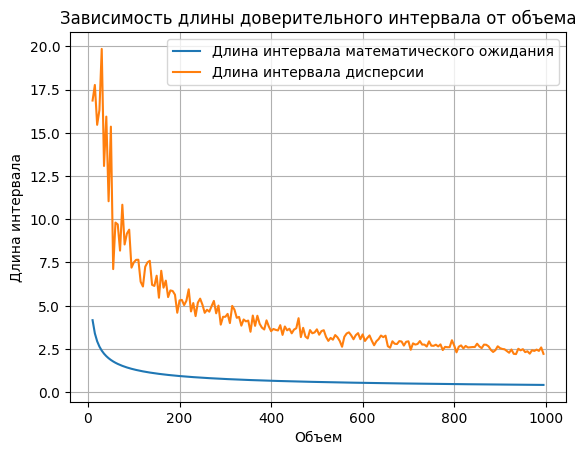

In [40]:
m_list = np.arange(10, 1000, 5)
# Списки для хранения длин интервалов для математического ожидания и дисперсии
lengths_mean = []
lengths_variance = []

for m in m_list:
    sample_item = np.random.normal(a, sigma, m)
    # Вычисляем интервальную оценку для математического ожидания
    mean_interval = sts.norm.interval(gamma, loc=sample_item.mean(), scale=sigma / np.sqrt(m))
    
    # Вычисляем интервальную оценку для дисперси
    variance_estimate = np.var(sample_item, ddof=1)
    chi2_lower, chi2_upper = sts.chi2.interval(gamma, m-1)
    variance_interval = ((m-1) * variance_estimate / chi2_upper,
                         (m-1) * variance_estimate / chi2_lower)
    
    # Вычисляем длину интервалов и добавляем их в списки
    lengths_mean.append(mean_interval[1] - mean_interval[0])
    lengths_variance.append(variance_interval[1] - variance_interval[0])


plt.plot(m_list, lengths_mean, label="Длина интервала математического ожидания")
plt.plot(m_list, lengths_variance, label="Длина интервала дисперсии")
plt.xlabel("Объем")
plt.ylabel("Длина интервала")
plt.legend()
plt.grid()
plt.title("Зависимость длины доверительного интервала от объема")
plt.show()

4

In [41]:
count = 0.0
M = 1000
for j in range(0,M):
    sample = np.random.normal(a, sigma, n)#создание выборки
    mean = statistics.mean(sample)

    interval = sts.norm.interval(gamma, mean, sigma/math.sqrt(n))
    
    if interval[0]<a and interval[1]>a:
        count +=1

GAMMA = count/M
print(GAMMA)

0.89


5-5.1

In [43]:
z_list = []
for j in range(0,M):
    sample_i = np.random.normal(a, sigma, n)
    S = np.std(sample_i, ddof=1)
    mean = statistics.mean(sample_i)

    z_list.append(((n-1)*S**2)/sigma**2)
print(z_list)

[8.946828530854887, 10.595350366747558, 16.962053323744914, 22.073759320765216, 16.947057610202673, 19.13394644141148, 9.486667904058532, 17.14171734793182, 20.071889617244054, 15.22600850936245, 15.241528222880513, 18.629352155753182, 9.464701703359676, 20.377944847658394, 11.712914834904783, 4.866511511045009, 16.973558338069196, 8.346626506380403, 10.841074185396167, 21.53606523747876, 10.646249085591716, 12.28670245406546, 25.51175802365865, 13.609733510968264, 18.36179070202624, 15.310556641342908, 20.20795576707649, 9.59724512208301, 15.821095492940096, 18.119442315506333, 16.893493253349547, 10.43250508516121, 7.8883603588079145, 15.871068334109772, 13.236020106039662, 19.26250662833063, 22.796559795166296, 24.955948116092745, 16.092978154685465, 15.020851853462144, 11.87518284058659, 12.911678674633569, 10.754795367300504, 7.842007246063462, 12.894071609642019, 18.11024672992583, 12.25596575570002, 22.665167728178133, 14.936682696845315, 13.485512443571338, 15.11337158768476, 1

5.2

Это распределение называется распределением Фишера (или F-распределением).
F-распределение используется для сравнения дисперсий двух выборок или для проверки гипотезы о равенстве дисперсий в двух популяциях.

5.3

In [44]:
print(f'Математическое ожидание: {statistics.mean(z_list)}')
print(f'Дисперсия: {statistics.variance(z_list)}') 
print(f'Эксцесс: {sts.kurtosis(z_list)}')
print(f'Коэфициент ассиметрии: {sts.skew(z_list)}')
print(f'Стандартное отклонение: {math.sqrt(statistics.variance(z_list))}')
print(f'Медиана: {statistics.median(z_list)}')

Математическое ожидание: 15.51261695124435
Дисперсия: 30.77059503974873
Эксцесс: 1.002644093908895
Коэфициент ассиметрии: 0.7182377629724962
Стандартное отклонение: 5.5471249345718485
Медиана: 14.983743511808083


5.4

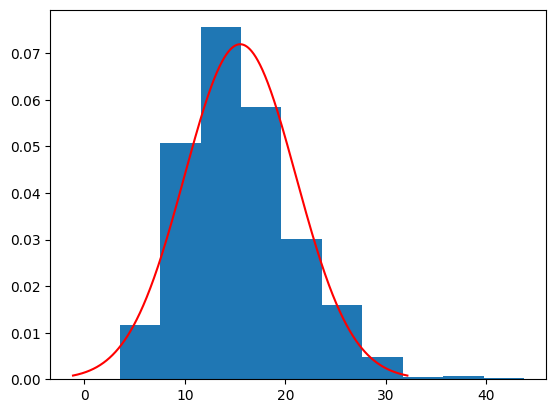

In [45]:
plt.hist(z_list, density=True)
a = statistics.mean(z_list)
sigma = statistics.stdev(z_list)
x = np.linspace(a - 3 * sigma, a + 3 * sigma, M)
y = sts.norm.pdf(x, a, sigma)

plt.plot(x, y, color='red', label='Теоретическая частота')